In [1]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator


In [2]:
%matplotlib widget

In [3]:
# Function to read data from file
def read_data(file_path):
    sizes = []
    times = []
    with open(file_path, 'r') as file:
        file.readline()  # Skip header
        for line in file:
            size, time = line.split()
            sizes.append(int(size))
            times.append(float(time))
    return sizes, times

In [4]:
# Read data from matmul files
sizes_avx2, matmul_avx2_O0_times = read_data("../solutions/matmul_avx2_O0_results.txt")
_, matmul_avx2_O1_times = read_data("../solutions/matmul_avx2_O1_results.txt")
_, matmul_avx2_O2_times = read_data("../solutions/matmul_avx2_O2_results.txt")
_, matmul_avx2_O3_times = read_data("../solutions/matmul_avx2_O3_results.txt")

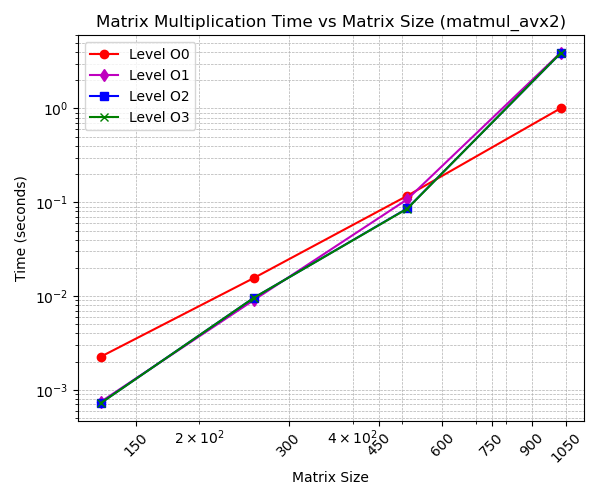

In [5]:
# Plotting matmul times
plt.figure(figsize=(6, 5))
plt.plot(sizes_avx2, matmul_avx2_O0_times, 'o-', label="Level O0", color="r")
plt.plot(sizes_avx2, matmul_avx2_O1_times, 'd-', label="Level O1", color="m")
plt.plot(sizes_avx2, matmul_avx2_O2_times, 's-', label="Level O2", color="b")
plt.plot(sizes_avx2, matmul_avx2_O3_times, 'x-', label="Level O3", color="g")

plt.xscale("log")
plt.yscale("log")
plt.title("Matrix Multiplication Time vs Matrix Size (matmul_avx2)")
plt.xlabel("Matrix Size")
plt.ylabel("Time (seconds)")

# Set x-ticks to match the sizes in the data and rotate them
plt.xticks(sizes_avx2, rotation=45)

plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))  # Force integer ticks
plt.gca().get_xaxis().set_major_formatter(plt.ScalarFormatter())


plt.legend()
plt.grid(True, which="both", linestyle="--", linewidth=0.5)

plt.savefig("matmul_avx2.png")

# Show the plot
plt.tight_layout()
plt.show()

In [6]:
# Read data from matmul files
sizes, matmul_O0_times = read_data("../solutions/matmul_O0_results.txt")
_, matmul_O1_times = read_data("../solutions/matmul_O1_results.txt")
_, matmul_O2_times = read_data("../solutions/matmul_O2_results.txt")
_, matmul_O3_times = read_data("../solutions/matmul_O3_results.txt")

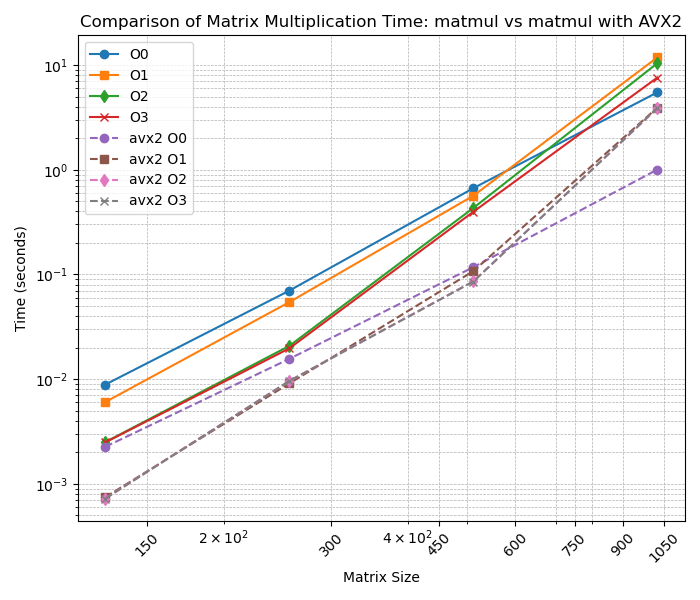

In [7]:
# Plotting the comparison
plt.figure(figsize=(7, 6))

# Plot matmul times
plt.plot(sizes, matmul_O0_times, 'o-', label="O0")
plt.plot(sizes, matmul_O1_times, 's-', label="O1")
plt.plot(sizes, matmul_O2_times, 'd-', label="O2")
plt.plot(sizes, matmul_O3_times, 'x-', label="O3")

# Plot matmul_avx2 times
plt.plot(sizes_avx2, matmul_avx2_O0_times, 'o--', label="avx2 O0")
plt.plot(sizes_avx2, matmul_avx2_O1_times, 's--', label="avx2 O1")
plt.plot(sizes_avx2, matmul_avx2_O2_times, 'd--', label="avx2 O2")
plt.plot(sizes_avx2, matmul_avx2_O3_times, 'x--', label="avx2 O3")

plt.xscale("log")
plt.yscale("log")
plt.title("Comparison of Matrix Multiplication Time: matmul vs matmul with AVX2")
plt.xlabel("Matrix Size")
plt.ylabel("Time (seconds)")
plt.legend()
plt.grid(True, which="both", linestyle="--", linewidth=0.5)

# Set x-ticks to match the sizes in the data and rotate them
plt.xticks(sizes, rotation=45)

plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))  # Force integer ticks
plt.gca().get_xaxis().set_major_formatter(plt.ScalarFormatter())

plt.savefig("commpare_matmul_and_matmul_avx2.png")

# Show the plot
plt.tight_layout()
plt.show()